# Import modules

In [1]:
from sklearn.datasets import load_diabetes
import pickle
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import os
import torch


from synthcity.metrics.eval_performance import (
    PerformanceEvaluatorMLP,
    PerformanceEvaluatorXGB,
)
from synthcity.utils import reproducibility
from synthcity.plugins import Plugins
import synthcity.logger as log
from synthcity.plugins.core.dataloader import GenericDataLoader
from DGE_utils import metric_different_datasets, mean_across_pandas, add_std, get_folder_names

reproducibility.clear_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


assert device.type == 'cuda'
Plugins(categories=["generic"]).list()


[2023-12-01T12:19:01.704705+0000][18603][CRITICAL] load failed: 
GReaT is not installed. Please install it with pip install GReaT.
Please be aware that GReaT is only available for python >= 3.9.

[2023-12-01T12:19:01.706076+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:19:01.706836+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T12:19:01.714838+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


['arf',
 'ddpm',
 'ctgan',
 'bayesian_network',
 'tvae',
 'rtvae',
 'dummy_sampler',
 'uniform_sampler',
 'marginal_distributions',
 'nflow']

# Load data and settings

In [2]:
from DGE_data import get_real_and_synthetic, get_real_and_synthetic_with_multiple_models

# let's restrict ourselves to classification datasets
datasets = ['moons', 'circles', 'breast_cancer',
            'adult', 'covid']
# ['moons', 'circles','cal_housing', 'adult', 'diabetes', 'breast_cancer',  'seer', 'cutract' ]
model_name = 'ctgan'  # synthetic data model
# model_names = ['tvae', 'nflow', 'ctgan', 'adsgan']
# model_name = model_names[0]
# for m in model_names[1:]:
#     model_name += "_" + m

n_models = 20  # number of models in ensemble, for each run. 20
max_n = 2000  # maximum number of data points to use for training generative model.
nsyn = 2000  # number of synthetic data points per synthetic dataset. Defaults to same as generative training size if None

num_runs = 5 # Number of runs. Don't choose to large, since total number of synthetic datasets is num_runs*n_models. 10

# Per section 4.1, 10 runs with different seeds

# Whether to load and save models and synthetic datasets
load = True  # results
load_syn = True  # data
save = True  # save results and data

verbose = True



# Experiments

## Model Training

Model to run:  ctgan
mixed models for downstream?  True
Downstream classifier model type:  ['deepish_mlp', 'largest_mlp', 'rf', 'svm', 'xgboost', 'knn']
meta learning model:  lr
n_models:  20
num_runs:  5
datasets:  ['breast_cancer', 'adult', 'covid']
model string:  ctgan
verbose:  True
Loading real data...
np.unique(y):  [0 1]
n_total 569 n_train: 455
Generating synthetic data with model:  ctgan
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing 

[2023-12-01T12:27:12.017725+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:27:12.018894+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:27:12.019567+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T12:27:12.020452+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


n_total 48842 n_train: 2000
Generating synthetic data with model:  ctgan
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic da

INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /var/tmp/tmpk_b6vglm
INFO:torch.distributed.nn.jit.instantiator:Writing /var/tmp/tmpk_b6vglm/_remote_module_non_scriptable.py
 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [03:25<08:01,  2.91it/s]
[2023-12-01T12:30:47.814703+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:30:47.815710+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:30:47.816267+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T12:30:47.817156+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed71.pkl
Training model 72/100


 35%|██████████████████████████████████████████████████████████                                                                                                            | 699/2000 [03:52<07:13,  3.00it/s]
[2023-12-01T12:34:48.113852+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:34:48.114869+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:34:48.115585+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T12:34:48.116430+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed72.pkl
Training model 73/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:57<07:48,  3.10it/s]
[2023-12-01T12:37:53.235824+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:37:53.236651+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:37:53.237352+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T12:37:53.238268+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed73.pkl
Training model 74/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:55<07:44,  3.12it/s]
[2023-12-01T12:40:56.753814+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:40:56.754728+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:40:56.755436+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T12:40:56.756383+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed74.pkl
Training model 75/100


 37%|██████████████████████████████████████████████████████████████▏                                                                                                       | 749/2000 [04:00<06:42,  3.11it/s]
[2023-12-01T12:45:04.925731+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:45:04.926793+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:45:04.927552+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T12:45:04.928533+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed75.pkl
Training model 76/100


 37%|██████████████████████████████████████████████████████████████▏                                                                                                       | 749/2000 [03:59<06:39,  3.13it/s]
[2023-12-01T12:49:12.173401+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:49:12.174255+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:49:12.174948+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T12:49:12.175911+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed76.pkl
Training model 77/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:45<07:18,  3.31it/s]
[2023-12-01T12:52:05.698093+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:52:05.699171+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:52:05.699871+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T12:52:05.700735+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed77.pkl
Training model 78/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:43<07:12,  3.36it/s]
[2023-12-01T12:54:56.862784+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:54:56.863737+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:54:56.864389+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T12:54:56.865136+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed78.pkl
Training model 79/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:39<07:00,  3.45it/s]
[2023-12-01T12:57:43.604674+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:57:43.605619+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T12:57:43.606493+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T12:57:43.607757+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed79.pkl
Training model 80/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:39<07:02,  3.43it/s]
[2023-12-01T13:00:31.239519+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:00:31.240515+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:00:31.241310+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:00:31.242199+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed80.pkl
Training model 81/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:41<07:06,  3.40it/s]
[2023-12-01T13:03:20.460264+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:03:20.461203+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:03:20.461860+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:03:20.462788+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed81.pkl
Training model 82/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:41<07:06,  3.40it/s]
[2023-12-01T13:06:09.489294+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:06:09.490160+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:06:09.490862+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:06:09.491811+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed82.pkl
Training model 83/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:39<07:02,  3.43it/s]
[2023-12-01T13:08:57.149043+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:08:57.149931+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:08:57.150632+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:08:57.151431+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed83.pkl
Training model 84/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:39<07:00,  3.45it/s]
[2023-12-01T13:11:44.077060+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:11:44.077915+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:11:44.078595+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:11:44.079549+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed84.pkl
Training model 85/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:39<07:01,  3.44it/s]
[2023-12-01T13:14:31.419652+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:14:31.420471+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:14:31.421301+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:14:31.422276+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed85.pkl
Training model 86/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:39<07:01,  3.44it/s]
[2023-12-01T13:17:18.571647+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:17:18.572631+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:17:18.573437+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:17:18.574530+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed86.pkl
Training model 87/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:39<07:02,  3.44it/s]
[2023-12-01T13:20:05.857072+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:20:05.858149+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:20:05.858870+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:20:05.859869+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed87.pkl
Training model 88/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:40<07:03,  3.43it/s]
[2023-12-01T13:22:53.538087+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:22:53.539075+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:22:53.540024+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:22:53.541103+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed88.pkl
Training model 89/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:40<07:04,  3.42it/s]
[2023-12-01T13:25:42.040642+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:25:42.041511+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:25:42.042171+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:25:42.043202+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed89.pkl
Training model 90/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:38<06:59,  3.46it/s]
[2023-12-01T13:28:28.555798+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:28:28.556802+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:28:28.557445+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:28:28.558197+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed90.pkl
Training model 91/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:40<07:05,  3.41it/s]
[2023-12-01T13:31:17.090954+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:31:17.091800+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:31:17.092592+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:31:17.093471+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed91.pkl
Training model 92/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:39<07:02,  3.44it/s]
[2023-12-01T13:34:04.594450+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:34:04.595782+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:34:04.596625+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:34:04.597563+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed92.pkl
Training model 93/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:39<07:00,  3.45it/s]
[2023-12-01T13:36:51.705010+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:36:51.705881+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:36:51.706589+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:36:51.707569+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed93.pkl
Training model 94/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:39<07:01,  3.44it/s]
[2023-12-01T13:39:38.899992+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:39:38.901055+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:39:38.901832+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:39:38.902684+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed94.pkl
Training model 95/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:39<07:01,  3.44it/s]
[2023-12-01T13:42:25.975609+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:42:25.976520+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:42:25.977263+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:42:25.978217+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed95.pkl
Training model 96/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:39<07:00,  3.45it/s]
[2023-12-01T13:45:12.861439+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:45:12.862435+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:45:12.863190+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:45:12.864068+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed96.pkl
Training model 97/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:41<07:07,  3.39it/s]
[2023-12-01T13:48:02.310768+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:48:02.312044+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:48:02.312795+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:48:02.313699+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed97.pkl
Training model 98/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:40<07:03,  3.43it/s]
[2023-12-01T13:50:50.343571+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:50:50.344606+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:50:50.345445+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:50:50.346521+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed98.pkl
Training model 99/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:39<07:02,  3.44it/s]
[2023-12-01T13:53:37.923717+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:53:37.924584+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-01T13:53:37.925539+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-01T13:53:37.927022+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/adult/ctgan/Xsyn_n2000_seed99.pkl
Training model 100/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [02:39<07:01,  3.45it/s]


Finished with synthetic data generation!
Dataset adult

number of synthetic datasets:  100
real train data size:  (2000, 14)
real test data size:  (46842, 14)
X shape:  (2000, 13)
y shape:  (2000,)
y elements:  [0 1 1 0 0 0 0 0 1 0]
targettype:  classification
include_concat:  True
n_models:  20
num_runs:  5
list size of synthetic datasets:  100
mixed_models:  True
meta_model:  lr
Computing means and stds
Ks to ensemble with:  [20, 10, 5]
run:  0
X_gt size:  (46842, 14)
Saving model as workspace/adult/ctgan/nmax_2000_nsyn_2000_mixed_stacking/supervised_task_stacking_deepish_mlp_mix_stacking_20_classifiers_oracle_run_0__0.pkl in stacking aggregate
training new model in aggregate stacking...
Train model 1/20
mixed downstream models
supervised task:  classification
model type:  deepish_mlp
initializing new model in supervised task stacking
Saving model as workspace/adult/ctgan/nmax_2000_nsyn_2000_mixed_stacking/supervised_task_stacking_largest_mlp_mix_stacking_20_classifiers_oracle_run_0_

[2023-12-02T12:17:17.176352+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T12:17:17.177598+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T12:17:17.178384+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T12:17:17.179237+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


np.unique(y):  [1 2]
n_total 20000 n_train: 2000
Generating synthetic data with model:  ctgan
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Found existing synthetic dataset. Loading...
Genera

 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 1249/2000 [09:53<05:56,  2.11it/s]
[2023-12-02T12:27:12.282492+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T12:27:12.283478+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T12:27:12.284113+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T12:27:12.285147+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed21.pkl
Training model 22/100


 55%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 1099/2000 [09:27<07:45,  1.94it/s]
[2023-12-02T12:36:41.369818+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T12:36:41.370826+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T12:36:41.371662+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T12:36:41.372584+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed22.pkl
Training model 23/100


 35%|██████████████████████████████████████████████████████████                                                                                                            | 699/2000 [05:41<10:35,  2.05it/s]
[2023-12-02T12:42:24.587607+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T12:42:24.588736+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T12:42:24.589749+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T12:42:24.591096+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed23.pkl
Training model 24/100


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [03:02<14:24,  1.91it/s]
[2023-12-02T12:45:29.878498+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T12:45:29.879678+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T12:45:29.880571+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T12:45:29.881671+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed24.pkl
Training model 25/100


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 1199/2000 [08:53<05:56,  2.25it/s]
[2023-12-02T12:54:26.300803+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T12:54:26.302920+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T12:54:26.304729+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T12:54:26.306857+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed25.pkl
Training model 26/100


 27%|█████████████████████████████████████████████▌                                                                                                                        | 549/2000 [04:28<11:50,  2.04it/s]
[2023-12-02T12:58:58.656152+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T12:58:58.657249+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T12:58:58.659111+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T12:58:58.660331+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed26.pkl
Training model 27/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [05:22<12:35,  1.86it/s]
[2023-12-02T13:04:23.895159+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:04:23.896216+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:04:23.897120+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T13:04:23.898289+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed27.pkl
Training model 28/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:11<09:49,  2.38it/s]
[2023-12-02T13:08:37.756745+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:08:37.757723+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:08:37.758399+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T13:08:37.759267+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed28.pkl
Training model 29/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:53<11:25,  2.04it/s]
[2023-12-02T13:13:33.413208+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:13:33.414175+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:13:33.414910+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T13:13:33.415867+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed29.pkl
Training model 30/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:36<10:46,  2.17it/s]
[2023-12-02T13:18:12.341971+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:18:12.342896+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:18:12.343754+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T13:18:12.344629+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed30.pkl
Training model 31/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:47<11:12,  2.08it/s]
[2023-12-02T13:23:01.021537+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:23:01.022463+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:23:01.023282+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T13:23:01.024163+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed31.pkl
Training model 32/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:40<10:56,  2.13it/s]
[2023-12-02T13:27:43.996201+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:27:43.997199+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:27:43.997898+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T13:27:43.998703+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed32.pkl
Training model 33/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:39<10:52,  2.15it/s]
[2023-12-02T13:32:25.502033+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:32:25.503029+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:32:25.503686+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T13:32:25.505132+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed33.pkl
Training model 34/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:16<09:59,  2.34it/s]
[2023-12-02T13:36:43.818761+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:36:43.819731+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:36:43.820427+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T13:36:43.821666+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed34.pkl
Training model 35/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [03:52<09:03,  2.58it/s]
[2023-12-02T13:40:38.018837+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:40:38.020031+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:40:38.020763+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T13:40:38.021635+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed35.pkl
Training model 36/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:46<11:10,  2.09it/s]
[2023-12-02T13:45:26.701455+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:45:26.702476+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:45:26.703265+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T13:45:26.704051+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed36.pkl
Training model 37/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:39<10:53,  2.14it/s]
[2023-12-02T13:50:08.518071+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:50:08.519031+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:50:08.519756+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T13:50:08.520628+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed37.pkl
Training model 38/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:40<10:55,  2.14it/s]
[2023-12-02T13:54:51.021103+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:54:51.022472+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:54:51.023620+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T13:54:51.024563+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed38.pkl
Training model 39/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:34<10:42,  2.18it/s]
[2023-12-02T13:59:28.273053+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:59:28.273949+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T13:59:28.274680+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T13:59:28.275678+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed39.pkl
Training model 40/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:44<11:04,  2.11it/s]
[2023-12-02T14:04:15.012666+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:04:15.013711+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:04:15.014449+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T14:04:15.015308+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed40.pkl
Training model 41/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:14<09:54,  2.36it/s]
[2023-12-02T14:08:31.557527+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:08:31.558474+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:08:31.559219+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T14:08:31.560255+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed41.pkl
Training model 42/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:44<11:04,  2.11it/s]
[2023-12-02T14:13:18.012096+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:13:18.013020+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:13:18.013721+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T14:13:18.014537+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed42.pkl
Training model 43/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:36<10:47,  2.16it/s]
[2023-12-02T14:17:57.791934+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:17:57.793625+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:17:57.794966+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T14:17:57.796860+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed43.pkl
Training model 44/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:36<10:45,  2.17it/s]
[2023-12-02T14:22:36.807845+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:22:36.808789+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:22:36.809512+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T14:22:36.810456+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed44.pkl
Training model 45/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:43<11:03,  2.11it/s]
[2023-12-02T14:27:23.020319+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:27:23.021361+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:27:23.022090+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T14:27:23.022955+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed45.pkl
Training model 46/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:41<10:59,  2.13it/s]
[2023-12-02T14:32:06.640578+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:32:06.641555+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:32:06.642167+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T14:32:06.643020+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed46.pkl
Training model 47/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:35<10:45,  2.17it/s]
[2023-12-02T14:36:45.026461+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:36:45.027728+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:36:45.028908+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T14:36:45.030129+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed47.pkl
Training model 48/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:40<10:55,  2.14it/s]
[2023-12-02T14:41:27.039126+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:41:27.040098+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:41:27.040737+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T14:41:27.041618+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed48.pkl
Training model 49/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:22<10:14,  2.28it/s]
[2023-12-02T14:45:51.417121+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:45:51.418143+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:45:51.418860+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T14:45:51.419781+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed49.pkl
Training model 50/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:41<10:58,  2.13it/s]
[2023-12-02T14:50:35.421141+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:50:35.422025+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:50:35.422895+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T14:50:35.424093+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed50.pkl
Training model 51/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:42<11:01,  2.12it/s]
[2023-12-02T14:55:20.132604+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:55:20.133619+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T14:55:20.134264+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T14:55:20.135067+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed51.pkl
Training model 52/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:45<11:08,  2.09it/s]
[2023-12-02T15:00:08.136613+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:00:08.137830+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:00:08.138656+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T15:00:08.139910+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed52.pkl
Training model 53/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:20<10:09,  2.30it/s]
[2023-12-02T15:04:31.244737+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:04:31.245658+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:04:31.246324+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T15:04:31.247193+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed53.pkl
Training model 54/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:10<09:46,  2.39it/s]
[2023-12-02T15:08:43.677149+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:08:43.678107+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:08:43.678779+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T15:08:43.679761+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed54.pkl
Training model 55/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:52<11:24,  2.05it/s]
[2023-12-02T15:13:38.375463+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:13:38.376309+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:13:38.376994+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T15:13:38.378086+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed55.pkl
Training model 56/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:42<11:01,  2.12it/s]
[2023-12-02T15:18:22.848058+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:18:22.849067+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:18:22.849836+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T15:18:22.850707+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed56.pkl
Training model 57/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:49<11:16,  2.07it/s]
[2023-12-02T15:23:14.496617+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:23:14.497789+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:23:14.498916+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T15:23:14.500196+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed57.pkl
Training model 58/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:33<10:40,  2.19it/s]
[2023-12-02T15:27:50.345199+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:27:50.346181+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:27:50.346858+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T15:27:50.347764+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed58.pkl
Training model 59/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:45<11:07,  2.10it/s]
[2023-12-02T15:32:37.945944+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:32:37.946860+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:32:37.947617+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T15:32:37.948449+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed59.pkl
Training model 60/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:55<11:30,  2.03it/s]
[2023-12-02T15:37:34.837212+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:37:34.838313+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:37:34.838996+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T15:37:34.839981+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed60.pkl
Training model 61/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [05:12<12:11,  1.92it/s]
[2023-12-02T15:42:49.544707+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:42:49.545709+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:42:49.546408+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T15:42:49.547338+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed61.pkl
Training model 62/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [03:51<09:00,  2.59it/s]
[2023-12-02T15:46:42.459935+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:46:42.460848+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:46:42.461705+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T15:46:42.462880+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed62.pkl
Training model 63/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:25<10:20,  2.26it/s]
[2023-12-02T15:51:09.652226+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:51:09.653131+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:51:09.653943+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T15:51:09.654805+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed63.pkl
Training model 64/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:48<11:14,  2.08it/s]
[2023-12-02T15:55:59.723002+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:55:59.723993+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T15:55:59.724765+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T15:55:59.725601+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed64.pkl
Training model 65/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:50<11:19,  2.06it/s]
[2023-12-02T16:00:52.457668+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:00:52.459335+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:00:52.460743+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T16:00:52.462330+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed65.pkl
Training model 66/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:42<11:00,  2.12it/s]
[2023-12-02T16:05:38.392083+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:05:38.393015+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:05:38.393697+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T16:05:38.394696+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed66.pkl
Training model 67/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:55<11:31,  2.03it/s]
[2023-12-02T16:10:35.977278+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:10:35.978551+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:10:35.979795+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T16:10:35.981127+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed67.pkl
Training model 68/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:54<11:28,  2.03it/s]
[2023-12-02T16:15:32.441102+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:15:32.442056+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:15:32.442827+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T16:15:32.443681+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed68.pkl
Training model 69/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:43<11:03,  2.11it/s]
[2023-12-02T16:20:18.530194+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:20:18.532523+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:20:18.534443+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T16:20:18.536630+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed69.pkl
Training model 70/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:42<11:01,  2.12it/s]
[2023-12-02T16:25:04.797770+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:25:04.798758+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:25:04.799474+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T16:25:04.800499+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed70.pkl
Training model 71/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:41<10:57,  2.13it/s]
[2023-12-02T16:29:47.904818+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:29:47.905905+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:29:47.906719+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T16:29:47.907742+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed71.pkl
Training model 72/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:43<11:02,  2.11it/s]
[2023-12-02T16:34:33.044533+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:34:33.045404+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:34:33.046122+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T16:34:33.047062+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed72.pkl
Training model 73/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:44<11:05,  2.11it/s]
[2023-12-02T16:39:19.789046+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:39:19.790000+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:39:19.790734+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T16:39:19.791647+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed73.pkl
Training model 74/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:48<11:14,  2.08it/s]
[2023-12-02T16:44:09.848081+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:44:09.849114+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:44:09.849752+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T16:44:09.850618+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed74.pkl
Training model 75/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:47<11:12,  2.08it/s]
[2023-12-02T16:48:59.417507+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:48:59.418464+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:48:59.419216+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T16:48:59.420130+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed75.pkl
Training model 76/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:37<10:49,  2.16it/s]
[2023-12-02T16:53:38.947147+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:53:38.948292+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:53:38.949011+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T16:53:38.949877+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed76.pkl
Training model 77/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:38<10:51,  2.15it/s]
[2023-12-02T16:58:18.582399+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:58:18.583275+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T16:58:18.584044+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T16:58:18.584862+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed77.pkl
Training model 78/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:37<10:49,  2.16it/s]
[2023-12-02T17:02:58.645535+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:02:58.646535+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:02:58.647261+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T17:02:58.648196+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed78.pkl
Training model 79/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:36<10:45,  2.17it/s]
[2023-12-02T17:07:36.584742+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:07:36.586089+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:07:36.586687+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T17:07:36.587533+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed79.pkl
Training model 80/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:35<10:43,  2.18it/s]
[2023-12-02T17:12:14.002727+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:12:14.003728+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:12:14.004400+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T17:12:14.005193+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed80.pkl
Training model 81/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:37<10:48,  2.16it/s]
[2023-12-02T17:16:53.537938+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:16:53.539033+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:16:53.539922+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T17:16:53.540842+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed81.pkl
Training model 82/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:37<10:48,  2.16it/s]
[2023-12-02T17:21:32.615915+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:21:32.616822+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:21:32.617652+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T17:21:32.618832+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed82.pkl
Training model 83/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:38<10:51,  2.15it/s]
[2023-12-02T17:26:13.223482+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:26:13.224436+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:26:13.225065+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T17:26:13.225848+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed83.pkl
Training model 84/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:36<10:45,  2.17it/s]
[2023-12-02T17:30:51.264930+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:30:51.266014+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:30:51.266891+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T17:30:51.267911+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed84.pkl
Training model 85/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:35<10:44,  2.17it/s]
[2023-12-02T17:35:28.732146+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:35:28.733031+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:35:28.733825+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T17:35:28.734720+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed85.pkl
Training model 86/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:38<10:51,  2.15it/s]
[2023-12-02T17:40:09.518724+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:40:09.519753+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:40:09.520557+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T17:40:09.521641+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed86.pkl
Training model 87/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:36<10:47,  2.16it/s]
[2023-12-02T17:44:48.055440+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:44:48.056354+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:44:48.057019+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T17:44:48.057849+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed87.pkl
Training model 88/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:45<11:08,  2.10it/s]
[2023-12-02T17:49:35.898474+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:49:35.899353+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:49:35.899984+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T17:49:35.900908+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed88.pkl
Training model 89/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:38<10:51,  2.15it/s]
[2023-12-02T17:54:16.787690+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:54:16.788893+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:54:16.789937+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T17:54:16.791495+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed89.pkl
Training model 90/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:39<10:53,  2.14it/s]
[2023-12-02T17:58:58.069115+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:58:58.070017+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T17:58:58.070755+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T17:58:58.071565+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed90.pkl
Training model 91/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:37<10:47,  2.16it/s]
[2023-12-02T18:03:36.915506+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:03:36.917173+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:03:36.917838+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T18:03:36.918754+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed91.pkl
Training model 92/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:36<10:46,  2.17it/s]
[2023-12-02T18:08:15.358973+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:08:15.359930+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:08:15.360708+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T18:08:15.361585+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed92.pkl
Training model 93/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:35<10:44,  2.18it/s]
[2023-12-02T18:12:52.966194+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:12:52.967272+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:12:52.968304+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T18:12:52.969418+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed93.pkl
Training model 94/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:42<11:01,  2.12it/s]
[2023-12-02T18:17:37.526819+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:17:37.527899+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:17:37.528626+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T18:17:37.529495+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed94.pkl
Training model 95/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:37<10:48,  2.16it/s]
[2023-12-02T18:22:17.216477+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:22:17.217509+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:22:17.218174+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T18:22:17.219146+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed95.pkl
Training model 96/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:37<10:49,  2.16it/s]
[2023-12-02T18:26:56.788274+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:26:56.789281+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:26:56.789994+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T18:26:56.790981+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed96.pkl
Training model 97/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:40<10:55,  2.14it/s]
[2023-12-02T18:31:38.913071+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:31:38.914135+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:31:38.915301+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T18:31:38.916849+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed97.pkl
Training model 98/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:41<10:58,  2.13it/s]
[2023-12-02T18:36:22.665538+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:36:22.666509+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:36:22.667170+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T18:36:22.667981+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed98.pkl
Training model 99/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:36<10:47,  2.16it/s]
[2023-12-02T18:41:01.295761+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:41:01.296800+0000][18603][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-02T18:41:01.297447+0000][18603][CRITICAL] module plugin_great load failed
[2023-12-02T18:41:01.298302+0000][18603][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating new data, filename is synthetic_data/covid/ctgan/Xsyn_n2000_seed99.pkl
Training model 100/100


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:42<11:00,  2.12it/s]


Finished with synthetic data generation!
Dataset covid

number of synthetic datasets:  100
real train data size:  (2000, 19)
real test data size:  (18000, 19)
X shape:  (2000, 18)
y shape:  (2000,)
y elements:  [ True  True  True  True  True  True  True  True  True  True]
targettype:  classification
include_concat:  True
n_models:  20
num_runs:  5
list size of synthetic datasets:  100
mixed_models:  True
meta_model:  lr
Computing means and stds
Ks to ensemble with:  [20, 10, 5]
run:  0
X_gt size:  (18000, 19)
Saving model as workspace/covid/ctgan/nmax_2000_nsyn_2000_mixed_stacking/supervised_task_stacking_deepish_mlp_mix_stacking_20_classifiers_oracle_run_0__0.pkl in stacking aggregate
loading existing model in aggregate stacking...
mixed downstream models
supervised task:  classification
model type:  deepish_mlp
Saving model as workspace/covid/ctgan/nmax_2000_nsyn_2000_mixed_stacking/supervised_task_stacking_largest_mlp_mix_stacking_20_classifiers_oracle_run_0__1.pkl in stacking aggre

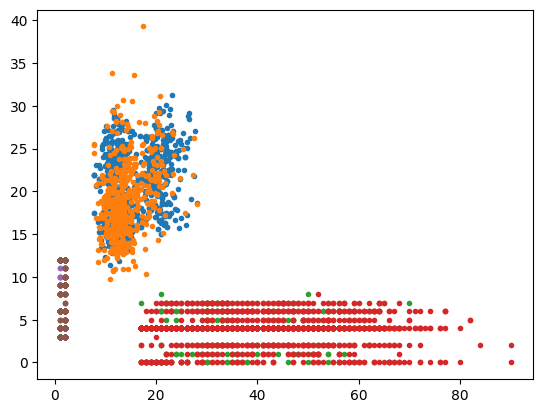

In [3]:
from DGE_experiments import predictive_experiment, predictive_experiment_stacking
import pandas as pd
import time


all_means = {}
all_stds = {}
all_meta_means = {}
all_meta_stds = {}
all_folds_means = {}
all_folds_stds = {}

#datasets = ['moons', 'circles', 'breast_cancer', 'adult', 'covid']
datasets = ['breast_cancer', 'adult', 'covid']
test_only_dataset = ['adult']
model_names = ['ctgan']
#num_runs=1
model_type = ['deepish_mlp', 'largest_mlp', 'rf', 'svm', 'xgboost', 'knn']
#model_type = 'deepish_mlp'
mixed_models = True
meta_model='lr'

print("Model to run: ", model_name)
print("mixed models for downstream? ", mixed_models)
print("Downstream classifier model type: ", model_type)
print("meta learning model: ", meta_model)
print("n_models: ", n_models)
print("num_runs: ", num_runs)
print("datasets: ", datasets)
print("model string: ", model_name)
print("verbose: ", verbose)

start_time = time.time()
for dataset in datasets:
    workspace_folder, results_folder = get_folder_names(
        dataset, model_name, max_n=max_n, nsyn=nsyn)

    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                          n_models=n_models*num_runs,
                                          model_name=model_name,
                                          load_syn=load_syn,
                                          verbose=verbose,
                                          max_n=max_n,
                                          nsyn=nsyn)


    print(f'Dataset {dataset}\n')
    print("number of synthetic datasets: ", len(X_syns))
    print("real train data size: ", X_gt.train().shape)
    print("real test data size: ", X_gt.test().shape)
    X,y = X_syns[0].unpack(as_numpy=True)
    print("X shape: ", X.shape)
    print("y shape: ", y.shape)
    print("y elements: ", y[:10])

    means, stds, _, meta_means, meta_stds, meta_scores_all, folds_means, folds_stds, folds_scores_all = predictive_experiment_stacking(X_gt,
                                            X_syns,
                                            workspace_folder=workspace_folder,
                                            results_folder=results_folder,
                                            save=save,
                                            load=load,
                                            plot=False,
                                            mixed_models=mixed_models,
                                            meta_model=meta_model,
                                            task_type=model_type,
                                            n_models=n_models,
                                            verbose=verbose
                                            )

    print("printing avg means to latex:")
    print(means.to_latex())
    print("printing orig stds to latex:")
    print(stds.to_latex())
    print("printing meta means to latex:")
    print(meta_means.to_latex())
    print("printing meta stds to latex:")
    print(meta_stds.to_latex())
    print("printing folds means to latex:")
    print(folds_means.to_latex())
    print("printing folds stds to latex:")
    print(folds_stds.to_latex())

    all_means[dataset] = means
    all_stds[dataset] = stds
    all_meta_means[dataset] = meta_means
    all_meta_stds[dataset] = meta_stds
    all_folds_means[dataset] = folds_means
    all_folds_stds[dataset] = folds_stds

    print("size of means: ", means.shape)
    print("mean elements: ", means)

end_time = time.time()
time_elapsed = end_time - start_time
print("Time it took to run the experiment: ", time_elapsed)

In [4]:
# Print results, aggregated over different datasets
print(X_syns[0].shape)
means_consolidated = metric_different_datasets(all_means, to_print=False)
if num_runs>1:
    stds_consolidated = metric_different_datasets(all_stds, to_print=False)
    stds_consolidated.drop(columns=['Mean'], inplace=True)
    print(add_std(means_consolidated, stds_consolidated).to_latex())
else:
    print(means_consolidated.to_latex())

meta_means_consolidated = metric_different_datasets(all_meta_means, to_print=False)
if num_runs>1:
    meta_stds_consolidated = metric_different_datasets(all_meta_stds, to_print=False)
    meta_stds_consolidated.drop(columns=['Mean'], inplace=True)
    print(add_std(meta_means_consolidated, meta_stds_consolidated).to_latex())
else:
    print(meta_means_consolidated.to_latex())

folds_means_consolidated = metric_different_datasets(all_folds_means, to_print=False)
if num_runs>1:
    folds_stds_consolidated = metric_different_datasets(all_folds_stds, to_print=False)
    folds_stds_consolidated.drop(columns=['Mean'], inplace=True)
    print(add_std(folds_means_consolidated, folds_stds_consolidated).to_latex())
else:
    print(folds_means_consolidated.to_latex())

(2000, 19)
\begin{tabular}{lllll}
\toprule
{} &   Adult Income &  Breast Cancer &       COVID-19 &   Mean \\
\midrule
Oracle              &  0.884 ± 0.001 &    0.988 ± 0.0 &  0.935 ± 0.001 &  0.936 \\
Naive (S)           &  0.807 ± 0.007 &  0.976 ± 0.002 &  0.813 ± 0.011 &  0.865 \\
Naive (E)           &  0.847 ± 0.008 &  0.977 ± 0.002 &  0.901 ± 0.001 &  0.908 \\
DGE\$\_\{5\}\$           &  0.841 ± 0.014 &  0.978 ± 0.002 &  0.902 ± 0.013 &  0.907 \\
DGE\$\_\{10\}\$          &  0.838 ± 0.015 &  0.975 ± 0.002 &  0.903 ± 0.013 &  0.905 \\
DGE\$\_\{20\}\$          &  0.838 ± 0.016 &  0.975 ± 0.002 &  0.904 ± 0.013 &  0.906 \\
DGE\$\_\{20\}\$ (concat) &  0.791 ± 0.011 &  0.968 ± 0.003 &  0.849 ± 0.009 &   0.87 \\
\bottomrule
\end{tabular}

\begin{tabular}{lllll}
\toprule
{} &   Adult Income &  Breast Cancer &       COVID-19 &   Mean \\
\midrule
Oracle              &  0.888 ± 0.001 &    0.987 ± 0.0 &   0.94 ± 0.001 &  0.938 \\
Naive (S)           &  0.807 ± 0.007 &  0.976 ± 0.002 &  0.813 ±

## Model Evaluation

We compare the single baseline model vs the generative uncertainty model vs an oracle. Workflow.
0. Train and generate synthetic datasets $S_i$.
1. Take each synthetic dataset $S_i$ and split it up in train and test.
2. Train a model $f_i$ on the train set, for each $S_i$
3. Evaluate on the same synthetic dataset's test set $S_{i,test}$, giving $\hat{M}^S_i$ [Naive evaluation]
4. Evaluate on the true real test set (oracle), $D_{test}$, giving $M_i$ [Oracle evaluation]
5. Evaluate on the other synthetic datasets $\cup_{j\neq i} S_{j}$, giving $\hat{M}^G_i$ [DGE evaluation]
6. Average over all models $f_i$. 

N.B. the idea of the above, is that the trained model $f_i$ is the same for each evaluation type. In the model selection section, we will compare the performance of different model classes, where we will train a new model for each evaluation type (hence the aim is to evaluate which class is best, while the model itself may vary).

In [ ]:
from DGE_experiments import model_evaluation_experiment

evaluation_means = {}
evaluation_std = {}
relative = False
max_n = 5000
nsyn = 5000
model_name = 'ctgan_deep'
datasets = ['moons', 'circles', 'adult', 'seer', 'covid']
model_type = 'deepish_mlp'
verbose = False

for dataset in datasets:
    print('Dataset:', dataset)
    workspace_folder, results_folder = get_folder_names(
        dataset, model_name, max_n=max_n, nsyn=nsyn)


    

    # load data
    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                          n_models=n_models,
                                          model_name=model_name,
                                          load_syn=load_syn,
                                          verbose=verbose,
                                          max_n=max_n,
                                          nsyn=nsyn)

    # get mean and std of dataset over different runs
    means, std, _ = model_evaluation_experiment(X_gt, X_syns, workspace_folder=workspace_folder, relative=relative,
                                             model_type=model_type,
                                             load=load,
                                             save=load,
                                             verbose=verbose,
                                             )

    evaluation_means[dataset] = means
    evaluation_std[dataset] = std


In [ ]:
# mean across datasets
# per dataset
metric = 'Acc'
res = metric_different_datasets(evaluation_means, metric=metric, to_print=False)
std_df = metric_different_datasets(evaluation_std, metric=metric, to_print=False)

del std_df['Mean']
res = add_std(res, std_df)
if relative != 'l2':
    print(res.to_latex(float_format=lambda x: '%.3f' % x))
else:
    print(res.to_latex(float_format=lambda x: '%.5f' % x))

### Vary the depth of the generative model


In [ ]:
from DGE_experiments import model_evaluation_experiment

genrun_means = {}
genrun_stds = {}
genrun_all = {}
dataset = 'seer'
relative = False
verbose = False

max_n = 5000
nsyn = 5000
n_models = 20

for layers, model_name in zip(range(1,4),['ctgan_shallow', 'ctgan', 'ctgan_deep']):

    workspace_folder, results_folder = get_folder_names(
            dataset, model_name, max_n=max_n, nsyn=nsyn)

    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                        p_train=p_train,
                                        n_models=n_models,
                                        model_name=model_name,
                                        load_syn=load_syn,
                                        verbose=verbose,
                                        max_n=max_n,
                                        nsyn=nsyn)


    _, _, all = model_evaluation_experiment(X_gt, X_syns, workspace_folder=workspace_folder, relative=relative,
                                             model_type='deep_mlp',
                                             load=load,
                                             save=load,
                                             verbose=verbose,
                                             )

    all['Hidden layers'] = layers
    genrun_all[layers] = all
    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

metric = 'AUC'
dfs = pd.concat(genrun_all,axis=0)
dfs.reset_index(inplace=True)
dfs['Hidden layers'] = dfs['level_0']
dfs = dfs[(dfs['Approach']=="DGE$_{20}$")|(dfs['Approach']=="DGE (K=20)")|(dfs['Approach']=='Naive')|(dfs['Approach']=='Oracle')]
sns.catplot(x='Hidden layers', y=metric, data=dfs, kind='box', hue='Approach', aspect=2, height = 3, showfliers=False, legend=False)
plt.legend()
plt.tight_layout()
plt.savefig(f'results/stories/eval_models_{dataset}_{metric}.png', dpi=300)
#draw line for oracle mean


## Model Selection
Essentially repeat the above for different models

In [ ]:
from DGE_experiments import model_selection_experiment

# load data
dataset = 'seer'
max_n = 5000
nsyn = 5000
X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                        n_models=n_models,
                                        model_name=model_name,
                                        load_syn=load_syn,
                                        verbose=verbose,
                                        max_n=max_n,
                                        nsyn=nsyn)



workspace_folder, results_folder = get_folder_names(
    dataset, model_name, max_n=max_n, nsyn=nsyn)

means_sorted, std = model_selection_experiment(X_gt, X_syns, relative=False,
                                                    workspace_folder=workspace_folder, 
                                                    load=load, save=save)




In [ ]:
A = add_std(means_sorted[metric].iloc[:5], std[metric])
B = means_sorted[metric].iloc[5:]
B.index = [f'{i}'.replace(' rank','') for i in B.index]
B = B.astype(int)
B.columns = ['' for i in B.columns]
C = pd.concat([A, B], axis=1)
print(C.to_latex())


### Run for different synthetic dataset size (Appendix)

In [ ]:
from DGE_experiments import model_selection_experiment
from DGE_data import get_real_and_synthetic
from DGE_utils import get_folder_names
import numpy as np
import sklearn

# load data
dataset = 'seer'
max_n = 5000
p_train = 0.8
n_models = 20
model_name = 'ctgan_deep'
load=True
save = True
load_syn = True
verbose = False
means = {}
stds = {}
model_types = ['mlp', 'deepish_mlp', 'deep_mlp', 'largest_mlp']

for nsyn in [1000, 2000, 5000,10000,20000]:
    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                            p_train=p_train,
                                            n_models=n_models,
                                            model_name=model_name,
                                            load_syn=load_syn,
                                            verbose=verbose,
                                            max_n=max_n,
                                            nsyn=nsyn)



    workspace_folder, results_folder = get_folder_names(
        dataset, model_name, max_n=max_n, nsyn=nsyn)

    means_sorted, std = model_selection_experiment(X_gt, X_syns, relative=False,
                                                        workspace_folder=workspace_folder, 
                                                        load=load, save=save, model_types=model_types )

    means[nsyn] = means_sorted
    stds[nsyn] = std


In [ ]:
x = means.keys()
metric = 'AUC'
from importlib import reload
import matplotlib.pyplot as plt
plt=reload(plt)
for i in range(len(means_sorted[metric])):    
    y = [means[j][metric].iloc[i] for j in x]
    labels = means[5000][metric].columns
    plt.semilogx(x, y, label=labels)
    plt.xlabel('Synthetic dataset size')
    name = means[5000][metric].index[i]
    if 'rank' in name:
        plt.ylabel('Ranking')
    else:
        plt.ylabel(metric)
    plt.legend()
    plt.savefig(f'results/stories/model_selection_mlps_nsyn_{name}_{metric}.png')
    plt.show()

## Underrepresented group

### Model training

In [ ]:
from DGE_data import get_real_and_synthetic
dataset = 'covid'
n_models = 20
num_runs = 10
max_n = 2000
nsyn = 2000
model_name = 'ctgan'
load = True
save = True
load_syn = True
verbose = False
reduce_to = None # used to get a very large set of real samples for evaluation (to accurately performance on small subgroups)


In [ ]:
X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                        n_models=n_models*num_runs,
                                        model_name=model_name,
                                        load_syn=load_syn,
                                        verbose=verbose,
                                        max_n=max_n,
                                        nsyn=nsyn,
                                        reduce_to=reduce_to)

# Get some indication of the distribution of the data
X_gt.train().data.hist()

Let us define the minority category for each feature

In [ ]:
import pandas as pd
from synthcity.plugins.core.dataloader import GenericDataLoader

def find_minority(data, feature):
    # Get the value that is the minority

    # turn data into dataframe if GenericDataLoader
    if type(data) != pd.DataFrame:
        data = data.data
    # find minority value
    if data[feature].unique().shape[0] < 20:

        counts = data[feature].value_counts()
        percentages = counts/counts.sum()
        counts = counts[percentages>0.005]
        value = counts.index[-1]
        percentage = percentages[value]
        # Create function that selects the minority value
        def subset(X):
            Xout = X[X[feature]==value]
            if type(Xout) == pd.DataFrame:
                Xout = GenericDataLoader(Xout, target='target')
                if hasattr(X, 'targettype'):
                    Xout.targettype = X.targettype
            return Xout
    else:
        quantile = 0.1
        threshold = data[feature].quantile(1-quantile)
        value = f'>={threshold:.2f}'
        percentage = quantile
        # Create function that selects the minority value
        def subset(X):
            Xout = X[X[feature]>=threshold]
            if type(Xout) == pd.DataFrame:
                Xout = GenericDataLoader(Xout, target='target')
                if hasattr(X, 'targettype'):
                    Xout.targettype = X.targettype
            return Xout

    return subset, value, percentage


In [ ]:
from DGE_experiments import predictive_experiment
from DGE_utils import get_folder_names
from synthcity.plugins.core.dataloader import GenericDataLoader

values = {}
results = {}
percentages = {}

workspace_folder, results_folder = get_folder_names(
        dataset, model_name, max_n=max_n, nsyn=nsyn)

feature = 'ALL'
features = X_gt.unpack(as_numpy=False)[0].columns

_, _, res = predictive_experiment(X_gt,
                                    X_syns,
                                    workspace_folder=workspace_folder,
                                    results_folder=results_folder,
                                    save=save,
                                    load=load,
                                    plot=False,
                                    outlier=False
                                    )

results[feature] = res


for feature in features:
    subset, value, percentage = find_minority(X_gt.train(), feature)
    print(f'Feature {feature},\n minority value {value},\n minority percentage {percentage}')
    if percentage > 0.2:
        print('skipping due to not being minority')
        continue
    
    
    try:
        _, _, res = predictive_experiment(X_gt,
                                            X_syns,
                                            workspace_folder=workspace_folder,
                                            results_folder=results_folder,
                                            save=save,
                                            load=load,
                                            plot=False,
                                            outlier=subset
                                            )
    except ValueError:
        print('Skipping due to too heavy imbalance making AUC non-computable')
        continue

    percentages[feature] = percentage
    values[feature] = value
    results[feature] = res



add the category name to each subset (just for plotting)

In [ ]:
results_copy = results.copy() # to got back if necessary

sorted_percentages = sorted(percentages.items(), key=lambda item: item[1])
sorted_percentages = dict(sorted_percentages)
#results_ = {f'{key}:{value} ({round(100*sorted_percentages[key],1)}%)': results[key] for key in list(sorted_percentages.keys())[::-1]}
results_ = {f'{key}:{values[key]}': results[key] for key in list(sorted_percentages.keys())[::-1]}
results_ = dict({'Overall':results['ALL']}, **results_)
results = results_

Plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

normalize = True
if normalize:
    results_ = {}
    for key, res in results.items():
        results_key = []
        for group in res.groupby('Approach'):
            res_ = group[1].drop(columns='Approach')-res[res['Approach']=='Oracle'].drop(columns='Approach')
            res_['Approach'] = group[0]
            results_key.append(res_)
        results_key = pd.concat(results_key, axis=0)
        results_[key] = results_key
else:
    results_ = results.copy()

metric = 'AUC'
baseline = 'E'

df = pd.concat(results_)
df['Subset'] = df.index.get_level_values(0)

if normalize:
    df = df[(df['Approach']=='DGE$_{20}$')|(df['Approach']==f'Naive ({baseline})')] #|(df['Approach']=='DGE$_{20}$ (concat)')
else:
    df = df[(df['Approach']=='DGE$_{20}$')|(df['Approach']==f'Naive ({baseline})')|(df['Approach']=='Oracle')] #|(df['Approach']=='DGE$_{20}$ (concat)')
# draw a horizontal line at y=0
g = sns.catplot(data=df, hue='Approach', y=metric, x='Subset', kind='box', aspect=3, showfliers=False, legend=False)
g.set_xticklabels(rotation=20)
if normalize:
    plt.axhline(y=0, color='k', linestyle='--')
    g.set_ylabels(metric+r' on subset relative to $\mathcal{D}_R$-model')
plt.tight_layout()
plt.legend()
plt.savefig(f'results/stories/underrepresented_training_nsyn{nsyn}_nmax{max_n}_{metric}_{baseline}.png', dpi=300)


## Influence of synthetic data size (uncertainty plots and confidence curves)

Let's study the effect of synthetic data size. Resulting plots are saved in /results/

In [ ]:
from DGE_experiments import predictive_experiment
import pandas as pd


all_means = {}
all_stds = {}
model_name = 'ctgan'
n_models = 20
max_n = 2000
model_type = 'mlp'

for dataset in ['adult', 'seer', 'covid', 'gaussian', 'circles', 'moons']:
    for nsyn in [2000, 5000, 10000, 20000]:
        workspace_folder, results_folder = get_folder_names(
            dataset, model_name, max_n=max_n, nsyn=nsyn)

        X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                            p_train=p_train,
                                            n_models=n_models,
                                            model_name=model_name,
                                            load_syn=load_syn,
                                            verbose=verbose,
                                            max_n=max_n,
                                            nsyn=nsyn)


        print(f'Dataset {dataset}\n')

        means, stds, _ = predictive_experiment(X_gt,
                                                X_syns,
                                                workspace_folder=workspace_folder,
                                                results_folder=results_folder,
                                                task_type = model_type,
                                                save=save,
                                                load=load,
                                                plot=True,
                                                )



# Cross validation

In [ ]:
from sklearn.datasets import load_diabetes
import pickle
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import os
import torch


from synthcity.metrics.eval_performance import (
    PerformanceEvaluatorMLP,
    PerformanceEvaluatorXGB,
)
from synthcity.utils import reproducibility
from synthcity.plugins import Plugins
import synthcity.logger as log
from synthcity.plugins.core.dataloader import GenericDataLoader
from DGE_utils import metric_different_datasets, mean_across_pandas, add_std, get_folder_names

reproducibility.clear_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


assert device.type == 'cuda'


/home/bv292/miniconda/envs/gen/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.



['sdv_tvae',
 'nflow',
 'rtvae',
 'adsgan',
 'privbayes',
 'sdv_ctgan',
 'copulagan',
 'ctgan',
 'dpgan',
 'bayesian_network',
 'tvae',
 'pategan',
 'gaussian_copula']

In [ ]:
from DGE_data import get_real_and_synthetic
from DGE_utils import get_folder_names, tt_predict_performance, cat_dl
from DGE_data import get_real_and_synthetic
from DGE_experiments import cross_val
import pandas as pd
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

# let's restrict ourselves to classification datasets
datasets = ['moons', 'circles', 'breast_cancer',
            'adult',  'seer', 'covid']
# ['moons', 'circles','cal_housing', 'adult', 'diabetes', 'breast_cancer',  'seer', 'cutract' ]
model_name = 'ctgan'  # synthetic data model

p_train = 0.8  # proportion of training data for generative model. Default values if None
n_models = 20  # number of models in ensemble, for each run
max_n = 2000  # maximum number of data points to use for training generative model.
nsyn = 2000  # number of synthetic data points per synthetic dataset. Defaults to same as generative training size if None

num_runs = 5  # Number of runs. Don't choose to large, since total number of synthetic datasets is num_runs*n_models

load = True  # results
load_syn = True  # data
save = True  # save results and data

verbose = False




In [ ]:
num_runs = 5
model_type = 'deepish_mlp'
model_name = 'ctgan'
nsyn = 5000
max_n = 2000
p_train = 0.8
n_models = 20
cross_fold = 5
load_syn = True
load = True
save = True
verbose = True

scores_s_all = {}
scores_r_all = {}

datasets = ['moons', 'circles', 'adult', 'seer', 'covid']

for dataset in ['seer']:
    workspace_folder, results_folder = get_folder_names(
        dataset, model_name, max_n=max_n, nsyn=nsyn)

    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                          p_train=p_train,
                                          n_models=n_models*num_runs,
                                          model_name=model_name,
                                          load_syn=load_syn,
                                          verbose=verbose,
                                          max_n=max_n,
                                          nsyn=nsyn)

    print(f'Dataset {dataset}\n')

    scores_s, scores_r = cross_val(X_gt,
                                  X_syns,
                                  workspace_folder=workspace_folder,
                                  results_folder=results_folder,
                                  save=save,
                                  load=load,
                                  task_type=model_type,
                                  cross_fold=cross_fold,
                                  verbose=verbose
                                  )

    scores_s_all[dataset] = scores_s
    scores_r_all[dataset] = scores_r


n_total 20000 n_train: 2000
Dataset seer

Computing means and stds
Oracle
Run 0 approach Oracle split 0
Run 0 approach Oracle split 1
Run 0 approach Oracle split 2
Run 0 approach Oracle split 3
Run 0 approach Oracle split 4
Naive
Run 0 approach Naive split 0
Run 0 approach Naive split 1
Run 0 approach Naive split 2
Run 0 approach Naive split 3
Run 0 approach Naive split 4
DGE$_{20}$
Run 0 approach DGE$_{20}$ split 0
Run 0 approach DGE$_{20}$ split 1
Run 0 approach DGE$_{20}$ split 2
Run 0 approach DGE$_{20}$ split 3
Run 0 approach DGE$_{20}$ split 4
DGE$_{20}$ (concat)
Run 0 approach DGE$_{20}$ (concat) split 0
Run 0 approach DGE$_{20}$ (concat) split 1
Run 0 approach DGE$_{20}$ (concat) split 2
Run 0 approach DGE$_{20}$ (concat) split 3
Run 0 approach DGE$_{20}$ (concat) split 4
Oracle
Run 1 approach Oracle split 0
Run 1 approach Oracle split 1
Run 1 approach Oracle split 2
Run 1 approach Oracle split 3
Run 1 approach Oracle split 4
Naive
Run 1 approach Naive split 0
Run 1 approach Na

seer
                          AUC       Acc        F1  Precision    Recall  \
approach                                                                 
DGE$_{20}$           0.891685  0.816435  0.795660   0.813860  0.779506   
DGE$_{20}$ (concat)  0.891235  0.816010  0.795599   0.812098  0.780960   
Naive                0.871665  0.801000  0.784552   0.796922  0.774290   
Oracle               0.907072  0.839700  0.837993   0.847325  0.829780   

                          NLL     Brier  split  
approach                                        
DGE$_{20}$           0.417805  0.131421    2.0  
DGE$_{20}$ (concat)  0.419103  0.131782    2.0  
Naive                0.487104  0.145416    2.0  
Oracle               0.413746  0.120595    2.0  
                          AUC       Acc        F1  Precision    Recall  \
approach                                                                 
DGE$_{20}$           0.905688  0.826376  0.823714   0.836676  0.811564   
DGE$_{20}$ (concat)  0.905147  0.8

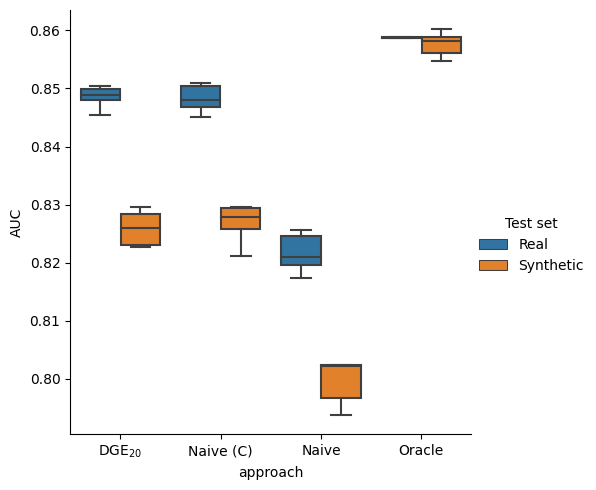

seer


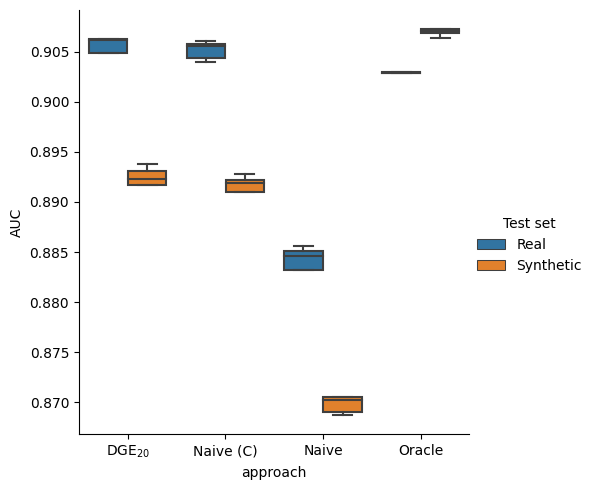

covid


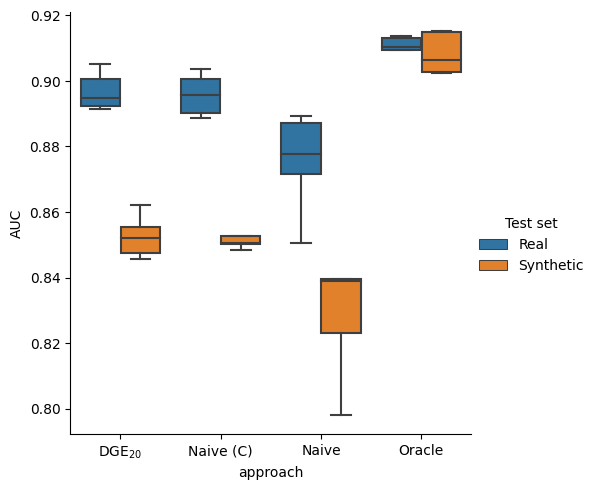

In [ ]:
metric = 'AUC'

for dataset in datasets[-3:]:
    print(dataset)
    scores_r_all[dataset]['Test set'] = 'Real'
    scores_s_all[dataset]['Test set'] = 'Synthetic'
    scores_ = pd.concat([scores_r_all[dataset], scores_s_all[dataset]],axis=0)
    scores_.reset_index(inplace=True)
    scores_.rename(columns={'index':'Approach'}, inplace=True)
    scores_ = scores_.mask(scores_ == 'DGE$_{20]$','DGE$_{20}$')
    scores_ = scores_.mask(scores_ == 'DGE$_{20}$ (concat)','Naive (C)')
    
    sns.catplot(data=scores_, x='approach', y=metric, hue='Test set', kind='box', showfliers=False)
    os.makedirs(f'./results/cross_val/', exist_ok=True)
    plt.savefig(f'./results/cross_val/{dataset}_{metric}_{model_name}_nsyn_{nsyn}_maxn{max_n}_{model_type}.png')
    plt.show()
